In [41]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
from utils_model import classes
from tensorflow import keras
from keras import backend as K
from keras.preprocessing import image 
from keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input


from  matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [20]:
def look_random_img(base_path):
    """To randomly check-out the image qualities."""
    plt.figure(figsize=(20,20))
    test_folder = f'{base_path}{random.choice(os.listdir(base_path))}'
    folder_name = test_folder.split('/')[-1]
    if folder_name != '.DS_Store':
        for i in range(5):
            file = random.choice(os.listdir(test_folder))
            image_path= os.path.join(test_folder, file)
            img=mpimg.imread(image_path)
            ax=plt.subplot(1,5,i+1)
            ax.title.set_text(file)
            im = plt.imshow(img)



    return im, folder_name

In [47]:
def images_for_pred():
    """Reads and preprocesses the images in the test folder"""
    pred_batches = image.ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    rescale=1.0/255.0
    ).flow_from_directory(
    directory=test_path, 
    target_size=target_size, 
    classes=['test'],
    shuffle=False)

    return pred_batches

In [48]:
def predict(test_batches):
    """Predicts the classes in the images and shows all of them with the prediction result"""
    pred = model.predict(test_batches)
    max_pred = []
    max_index = []
    for i in range(len(pred)):
        max_value = max(pred[i])
        pred_index = np.argmax(pred[i])
        max_pred.append(max_value)
        max_index.append(pred_index)
    plt.figure(figsize=(20,60))
    for i in range(len(test_batches.filenames)):
        pred_class = classes[max_index[i]]
        test_file = test_batches.filenames[i].split("/")[1]
        image_path= f'{test_path}{test_batches.filenames[i]}'
        img=mpimg.imread(image_path)
        ax=plt.subplot(14,5,i+1)
        ax.title.set_text(f'{test_file} \n Predicted as {pred_class}, \n P: {max_pred[i]}' )
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        pred_images = plt.imshow(img)
    
    return pred_images    

In [49]:
model = load_model("cnn_objects.h5")

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

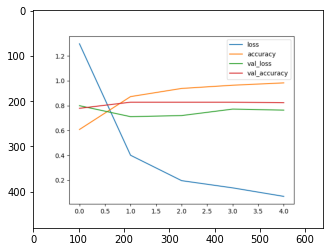

In [51]:
acc_plot = mpimg.imread('cnn_object_plot.png')
plt.imshow(acc_plot)

In [52]:
base_path = './data/'
test_path ='./test_data/'
target_size=(128,128)
input_shape = (128, 128, 3)
epochs = 150
batch_size=32

Found 68 images belonging to 1 classes.


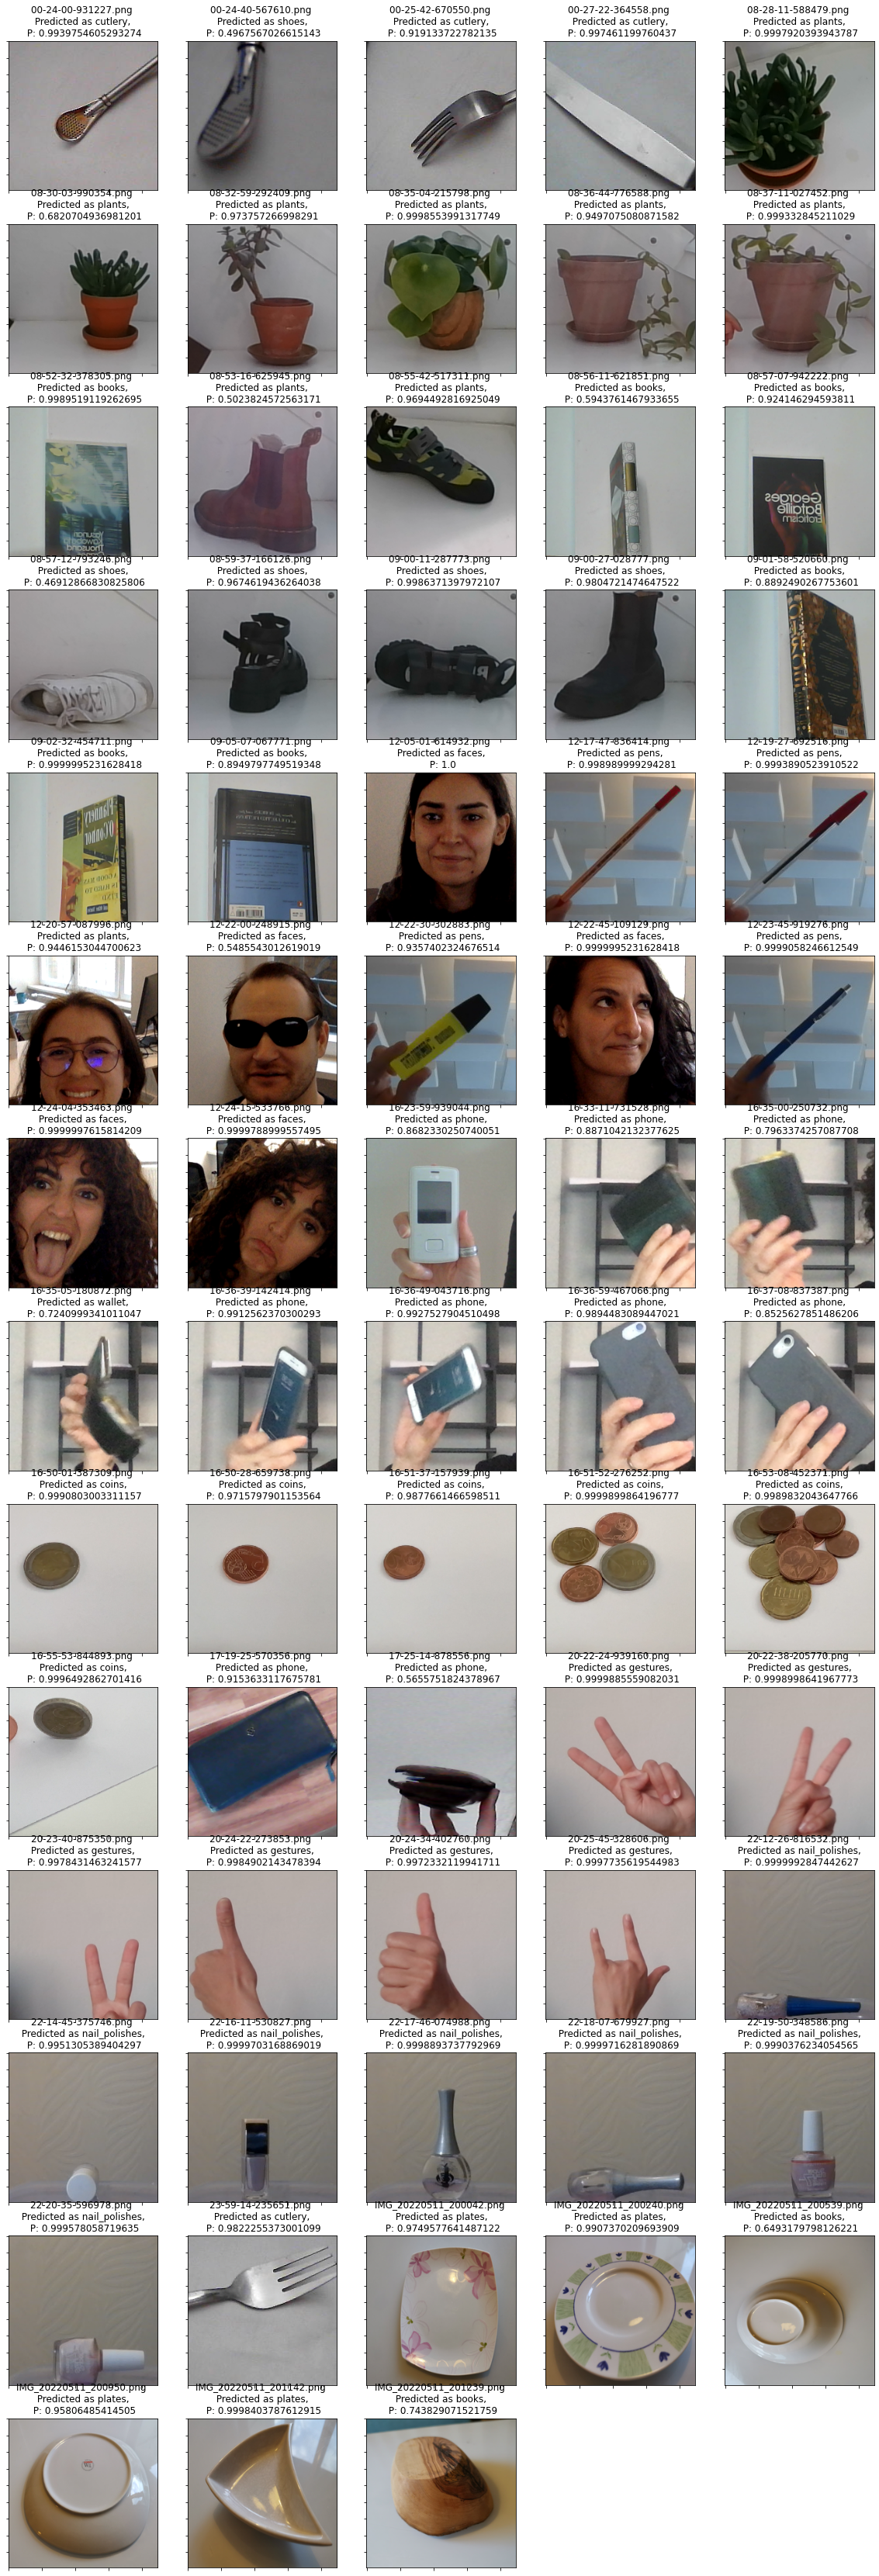

In [53]:
pred_batches = images_for_pred()
pred_images = predict(pred_batches)